In [90]:
import pandas as pd
import re
import numpy as np

In [54]:
data = pd.read_table("models/big_test.tbl")

In [55]:
data_useful = data[6:]
data_useful = data_useful.T.applymap(lambda x: x.replace('"', '').split(","))
data_useful = pd.concat([pd.Series(row[1][0]) for row in data_useful.T.iterrows()], axis=1)

In [56]:
data_useful

,0,1,2,3,4,5,6,7,8,9,...,450890,450891,450892,450893,450894,450895,450896,450897,450898,450899
0,3,2,4,2,3,4,3,2,4,2,...,900,900,900,900,900,900,900,900,900,900
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,...,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5
3,5,5,5,5,5,5,5,5,5,5,...,10,10,10,10,10,10,10,10,10,10
4,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
5,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
6,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
7,0,0,0,1,1,1,2,2,2,3,...,491,492,493,494,495,496,497,498,499,500
8,1,1,1,204,216,208,206,196,216,201,...,19,15,17,19,20,19,16,12,17,12


In [110]:
lookup = data_useful.loc[[0, 7, 8], :].T
lookup[0] = lookup[0].astype(np.int32)
lookup[7] = lookup[7].astype(np.int32)
lookup[8] = lookup[8].astype(np.int32)

lookup = lookup.sort_values(by=[0, 7], ascending=[True, True])

In [138]:
data = lookup.groupby(by=[0]).apply(lambda x: np.min(x[8].tail(50)))

In [139]:
data.index = data.index.droplevel(0)

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

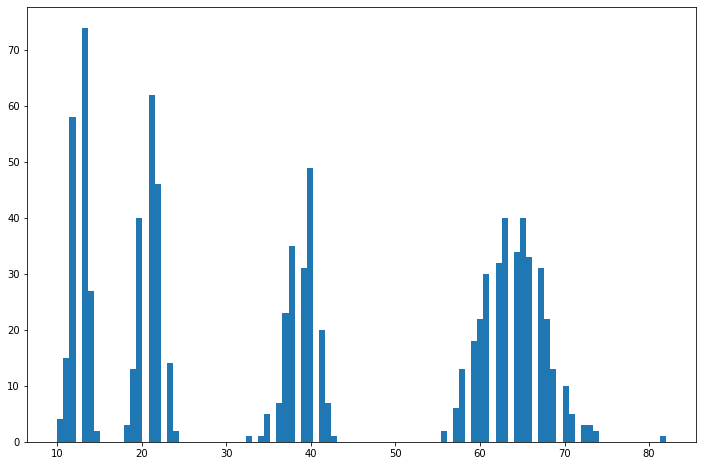

In [144]:
data.hist(figsize=(12, 8), bins=(100), grid=False)

In [165]:
index_admissible = lookup[(lookup[7].isin(range(450, 500))) & (lookup[8].isin({10, 11, 12, 13, 14, 15}))].index

In [176]:
data_useful.loc[[3, 4], index_admissible].T.apply(lambda x: tuple([x[3], x[4]]), axis=1).unique()

array([('5', '5'), ('6', '5'), ('7', '5'), ('8', '5'), ('9', '5'),
       ('10', '5')], dtype=object)